# 5. Softmax Regression

> 소프트맥스 회귀는 3개 이상의 선택지로부터 1개를 선택하는  
다중 클래스 분류(Multi-class classification)에서 사용한다.

## 5-1. One-Hot Encoding

> 원핫 인코딩은 범주형 데이터를 수치형 벡터 데이터로 바꾸는 것을 말한다.  
강아지, 고양이, 냉장고라는 범주형 데이터가 있을 때,  
강아지 = [1, 0, 0]  
고양이 = [0, 1, 0]  
냉장고 = [0, 0, 1]  
위와같이 변환하는 것을 말한다.

## 5-2. Multi-class Classification

> 로지스틱 회귀를 스팸 메일 분류기에 적용했을 때,  
스팸일 확률이 0.75라면 스팸이 아닐 확률은 0.25가 된다.  
이 두 확률의 총 합은 1이 된다.

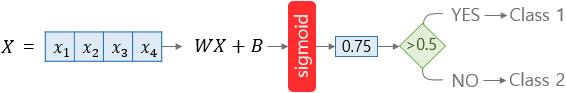

> 소프트맥스 회귀 또한 총합이 1이 되는 아이디어를 적용한다.  
각 선택지마다 소수 확률을 할당하고, 이때 총 확률의 합은 1이 되어야 한다.

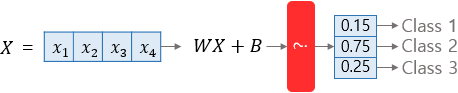

>즉, 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고,  
해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나야 한다.  
이 함수를 소프트맥스 함수라고 한다.

## 5-3. Softmax Function

> 소프트맥스 함수는 정답지(클래스)의 총 개수가 k일 때,  
k차원의 벡터를 입력으로 받아 각 클래스에 대한 확률을 추정한다.

> $z_i$ : k차원의 벡터에서 i번째 원소  
$p_i$ : i번째 클래스가 정답일 확률

### $p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ \text{for}\ i=1, 2, ... k$

|SepalLengthCm($x_1$)|SepalWidthCm($x_2$)|PetalLengthCm($x_3$)|PetalWidthCm($x_4$)|Species($y$)|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

>위와 같은 4개의 입력(꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃입 넓이)으로,  
setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지 확인한다고 할 때,  
$k=3$이므로, 3차원 벡터 $z=[z_1,z_2,z_3]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 낸다.

### $softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값} = [p_{virginica}, p_{setosa}, p_{versicolor}]$
> $p_1$, $p_2$, $p_3$은 각각의 클래스가 정답일 확률을 나타내며,  
각각 0과 1사의 값으로 총합은 1이 된다.  

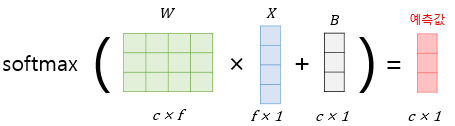

> 다시 위와 같이 표현할 수 있다.  
여기서 $c$는 클래스의 개수를, $f$는 특성의 수를 나타낸다.

> 전체 샘플의 개수가 5개, 특성이 4개 이므로  
5×4 행렬 $X$로 정의한다.

### $X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)
$ 
> 각 행렬의 원소 위치를 반영한 변수로 표현하면 다음과 같다.

### $X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
$  
> 선택지가 총 3개인 문제이므로 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 한다.  
그리고 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 크기는 동일해야 한다.  
결과적으로 행렬 $\hat{Y}$의 크기는 5×3이다.

### $\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
  $
> 5×4 입력 행렬 $X$, 5×3 예측값 행렬 $\hat{Y}$를 보아,  
가중치 행렬 $W$의 크기는 4×3임을 알 수 있다.

### $W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
$
> 편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 같아야 하므로  
5×3의 크기를 갖는다.

### $B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
$
> 결과적으로 가설식은 다음과 같다.

### $\hat{Y} = softmax(XW + B)$
### $\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
=
softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$

## 5-5. Loss Function

> 소프트맥스 회귀에서는 손실 함수로 **크로스 엔트로피 함수**를 사용한다.  
크로스 엔트로피 함수와 다양한 표기 방법에 대해 이해해보자.

> $y$ : 실제값  
$k$ : 클래스 개수  
$y_j$ : 실제값 원-핫 벡터의 $j$번째 인덱스  
$p_j$ : 샘플 데이터가 $j$번째 클래스일 확률 ($=\hat{y}_j$)

### $loss(W) = -\displaystyle\sum_{j=1}^{k}y_{j}\ \log(p_{j})$

> 만약 $c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면,  
$p_c = 1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 된다.  
이를 식에 대입해보면 $-1\log(1)=0$이 되기 때문에,  
결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 된다.  
즉 위 손실 함수를 최소화하는 방향으로 학습할 수 있다.

> 이제 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 손실 함수는 다음과 같다.

### $loss(W) = -\frac{1}{n} \displaystyle\sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

## 5-6. Binary Cross Entropy

> 위 수식은 로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만,  
본질적으로 동일한 함수식이다.  
로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해보자.

### $loss(W) = -(y\ \log H(X) + (1-y)\ \log(1-H(X)))$

> 위 식에서 $y$를 $y_1$, $1-y$를 $y_2$로 치환하고,  
$H(X)$를 $p_1$, $1-H(X)$를 $p_2$로 치환해보자.

### $-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))$

> 위 식은 다음과 같이 표현할 수 있다.

### $-(\displaystyle\sum_{i=1}^{2}y_{i}\ \log\ p_{i})$

> 소프트맥스 회귀에서는 $k$의 값이 고정된게 아니므로,  
$2$를 $k$로 변경하자.

### $-(\displaystyle\sum_{i=1}^{k}y_{i}\ \log\ p_{i})$

> 이제 소프트맥스 회귀의 손실 함수 식과 똑같아졌다.  
역으로도 가능하다.  
정리하면 소프트맥스 함수의 최종 손실 함수에서 $k$가 $2$라고 가정하면  
결국 로지스틱 회귀의 손실 함수와 같다.

### $loss(W) = \displaystyle-\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ \log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}\log(p^{(i)}) + (1-y^{(i)})\log(1-p^{(i)})]$

## 5-7. Implement Loss Function in Softmax Regression (Low Level)

In [1]:
import torch
import torch.nn.functional as F

In [2]:
torch.manual_seed(1)

> 소프트맥스 회귀를 구현하기 전에 먼저 소프트맥스 함수의 손실 함수를 구현해보자  

In [3]:
z = torch.FloatTensor([1, 2, 3])

In [4]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


> 3개의 원소 값이 0과 1사이의 값을 가지고 있다.  
이 원소들의 합이 1인지 확인해보자.

In [5]:
hypothesis.sum()

tensor(1.)

> 손실 함수를 구현해보자.  
먼저 임의의 3×5 텐서를 만든다.

In [6]:
z = torch.rand(3, 5, requires_grad=True)

> 이제 이 텐서에 대해 소프트맥스 함수를 적용한다.  
단, 각 샘플에 대해서 소프트맥스 함수를 적용해야 하므로,  
두 번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 `dim=1`을 써준다.

In [7]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


> 이제 각 행의 원소들의 합이 1이 되는 텐서로 변환됐다.  
소프트맥스 함수의 출력값은 결국 예측값이다.  
즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과다.

> 이제 각 샘플에 대해 임의의 레이블을 만들자.

In [8]:
y = torch.randint(5, (3,)).long() # 0~4사이의 첫 차원의 요소 수가 3인 텐서 생성
print(y)

tensor([0, 2, 1])


> 각 레이블에 대해 원-핫 인코딩을 수행하자.

In [9]:
# 모든 원소가 0의 값을 가진 3×5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

> `y_one_hot.scatter(1, y.squeeze(1), 1)`을 해석해보자.  
첫 번째 인자인 1은 `dim=1`로, scatter할 차원을 의미한다.  
두 번째 인자에서 `y.unsqueeze(1)`은 (3,) 크기인 y를 (3, 1) 크기로 바꾸는 역할을 하며,  
scatter할 위치를 의미한다.  
세 번째 인자인 `1`은 앞서 두 인자로 정해진 차원과 위치에 1을 표기할 것을 의미한다.

> 결과적으로 원-핫 인코딩되었다.

> 소프트맥스 회귀의 손실 함수는 다음과 같고,  

### $loss(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ \log(p_{j}^{(i)})$

> 마이너스 부호를 뒤로 빼면 다음 식과 같다.  

### $loss(W) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ × (-\log(p_{j}^{(i)}))$

$\sum_{j=1}^{k}$는 `sum(dim=1)`로 구현하고, $\frac{1}{n} \sum_{i=1}^{n}$은 `mean()`으로 구현할 수 있다.

In [10]:
loss = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(loss)

tensor(1.4689, grad_fn=<MeanBackward0>)


## 5-8 Implement Loss Function in Softmax Regression (High Level)

### F.softmax() + torch.log() = F.log_softmax()

> 앞서 소프트맥스 함수의 결과에 로그를 씌울 때는  
다음과 같이 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용했었다.  

In [11]:
# Low Level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

> pytorch에는 이미 두 개의 함수를 결합한 `F.log_softmax()`를 제공하고 있다.

In [12]:
# High Level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

### F.log_softmax() + F.nll_loss() = F.cross_entropy()
> 앞서 로우 레벨에서 손실 함수는 다음과 같이 구현했었다.

In [13]:
# Low Level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

> 방금 수식에서 `torch.log(F.softmax(z, dim=1))`를 `F.log_softmax(z, dim=1)`로 대체할 수 있다.

In [14]:
(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

> 여기서 더 나아가 `F.nll_loss()`를 사용하면 원-핫 벡터를 넣을 필요없이  
바로 실제값을 인자로 사용할 수 있다.

In [15]:
# High Level
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

> 여기서 nll이란, Negative Log Likelihood의 약자다.  
`nll_loss`는 `F.log_softmax()`를 수행한 후에 남은 수식들을 수행한다.  
이를 더 간단히 할 수도 있다.

In [16]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

> `F.cross_entropy()`는 `F.log_softmax()`와 `F.nll_loss()`를 포함하고 있다.

## 5-9. Implement Softmax Regression (Low Level)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
torch.manual_seed(1)

> 훈련 데이터와 레이블을 준비하자.  
x_train의 각 샘플은 4개의 특성을 가지고 있고, 총 8개의 샘플이 있다.  
y_train은 각 샘플에 대한 레이블인데, 0, 1, 2의 값을 가지는 것을 보아 총 3개의 클래스가 존재한다.

In [19]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [20]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


> x_train의 크기는 8×4이며, y_train의 크기는 8×1이다.  
최종 사용할 레이블은 y_train에서 원-핫 인코딩을 한 결과여야 하므로,  
클래스의 개수가 3개인 것을 생각해보면, 8×3 크기여야 한다.

In [21]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


> 다음으로 모델을 초기화해보자.  
총 3개의 클래스가 존재하므로,  
W 행렬의 크기는 4×3이어야 한다.

In [22]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

> F.softmax()와 torch.log()를 사용하여 가설과 손실 함수를 정의하고,  
총 1000번의 에포크를 수행하자.

In [23]:
epochs = 1000
for epoch in range(epochs+1):
    hypothesis = F.softmax(x_train.matmul(W)+b, dim=1)
    loss = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Loss: {loss.item():.6f}')

Epoch    0/1000 Loss: 0.411980
Epoch  100/1000 Loss: 0.134763
Epoch  200/1000 Loss: 0.074787
Epoch  300/1000 Loss: 0.050532
Epoch  400/1000 Loss: 0.037793
Epoch  500/1000 Loss: 0.030045
Epoch  600/1000 Loss: 0.024871
Epoch  700/1000 Loss: 0.021185
Epoch  800/1000 Loss: 0.018432
Epoch  900/1000 Loss: 0.016302
Epoch 1000/1000 Loss: 0.014606


## 5-10. Implement Softmax Regression (High Level)

> `F.cross_entropy()`를 사용해서 손실 함수를 구현해보자.  
주의할 점은 `F.cross_entropy()`는 그 자체로 소프트맥스 함수를 포함하고 있으므로  
가설에서는 소프트맥스 함수를 사용할 필요가 없다.

In [24]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros((1, 3), requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

epochs = 1000
for epoch in range(epochs + 1):
    z = x_train.matmul(W) + b
    loss = F.cross_entropy(z, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Loss: {loss.item():.6f}')

Epoch    0/1000 Loss: 1.098612
Epoch  100/1000 Loss: 0.704199
Epoch  200/1000 Loss: 0.622999
Epoch  300/1000 Loss: 0.565717
Epoch  400/1000 Loss: 0.515291
Epoch  500/1000 Loss: 0.467662
Epoch  600/1000 Loss: 0.421278
Epoch  700/1000 Loss: 0.375402
Epoch  800/1000 Loss: 0.329766
Epoch  900/1000 Loss: 0.285073
Epoch 1000/1000 Loss: 0.248155


In [25]:
print(W, b)

tensor([[-3.0408,  0.4448,  2.5961],
        [-0.3537, -0.1772,  0.5308],
        [ 2.3953, -0.4589, -1.9364],
        [-0.6828,  1.0930, -0.4102]], requires_grad=True) tensor([[-2.3578, -0.9655,  3.3234]], requires_grad=True)


## 5-11. Implement Softmax Regression with nn.Module

In [26]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs + 1):
    prediction = model(x_train)
    loss = F.cross_entropy(prediction, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Loss: {loss.item():.6f}')

Epoch    0/1000 Loss: 1.616785
Epoch  100/1000 Loss: 0.658891
Epoch  200/1000 Loss: 0.573443
Epoch  300/1000 Loss: 0.518151
Epoch  400/1000 Loss: 0.473265
Epoch  500/1000 Loss: 0.433516
Epoch  600/1000 Loss: 0.396563
Epoch  700/1000 Loss: 0.360914
Epoch  800/1000 Loss: 0.325392
Epoch  900/1000 Loss: 0.289179
Epoch 1000/1000 Loss: 0.254148


In [27]:
list(model.parameters())

[Parameter containing:
 tensor([[-3.1120, -0.3276,  2.3522, -0.4711],
         [ 0.4027, -0.1933, -0.4841,  1.2384],
         [ 2.5657,  0.5388, -1.9292, -0.2536]], requires_grad=True),
 Parameter containing:
 tensor([-2.2920, -1.0112,  3.2545], requires_grad=True)]

In [28]:
temp = model(x_train)
temp

tensor([[-4.1780, -0.2408,  4.7150],
        [-2.7291,  0.6254,  2.6299],
        [-6.7833,  3.5049,  4.6885],
        [-5.6620,  4.1778,  3.1422],
        [ 1.7085,  1.8100, -1.3221],
        [ 2.8753,  4.0149, -4.2698],
        [ 3.9172,  2.7576, -4.0437],
        [ 5.4707,  3.3186, -5.6877]], grad_fn=<AddmmBackward0>)

In [29]:
F.softmax(temp, dim=1)

tensor([[1.3636e-04, 6.9921e-03, 9.9287e-01],
        [4.1296e-03, 1.1824e-01, 8.7763e-01],
        [7.9773e-06, 2.3441e-01, 7.6558e-01],
        [3.9326e-05, 7.3798e-01, 2.6198e-01],
        [4.6403e-01, 5.1357e-01, 2.2407e-02],
        [2.4235e-01, 7.5746e-01, 1.9116e-04],
        [7.6106e-01, 2.3867e-01, 2.6549e-04],
        [8.9586e-01, 1.0413e-01, 1.2771e-05]], grad_fn=<SoftmaxBackward0>)

## 5-12. Implement Softmax Regression with Class

In [30]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)
        
    def forward(self, x):
        return self.linear(x)

model = SoftmaxClassifierModel()

## 5-13. MNIST data Classification with Softmax Regression

### MNIST 데이터

> MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋이다.  
과거 우체국에서 편지의 우편번호를 인식하기 위해 만들어진 훈련 데이터다.  
총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있다.

> MNIST 문제는 손글씨로 적힌 숫자 이미지가 입력으로 들어오면,  
그 이미지가 무슨 숫자인지 맞추는 문제다.

> 각각의 이미지는 28×28 크기의 픽셀 단위 이미지다.  

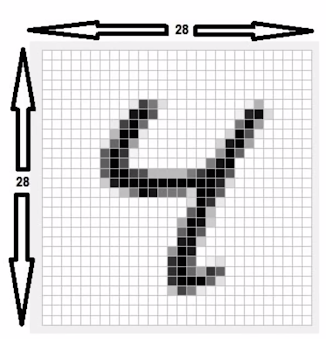

> 이 문제를 풀기 위해 28 × 28 = 784 이므로,  
각 이미지를 총 784개의 원소를 가진 벡터로 만들어 사용한다.

### 사전 설정

In [31]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [32]:
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print('다음 기기로 학습합니다:', device)

다음 기기로 학습합니다: cuda


In [33]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [34]:
epochs = 20
batch_size = 100

### 데이터 불러오기

In [35]:
mnist_train = dsets.MNIST(
    root='MNIST_data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
mnist_test = dsets.MNIST(
    root='MNIST_data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [36]:
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True # 마지막 배치는 버릴것인지
)

### 모델 설계

In [37]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [38]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

### 학습

In [39]:
for epoch in range(epochs):
    avg_loss = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        
        X = X.view(-1, 28*28).to(device)
        
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        loss = loss_fn(hypothesis, Y)
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
    
    print(f'Epoch: {epoch+1:04d} Loss: {avg_loss:.9f}')

print('Learning Finished')

Epoch: 0001 Loss: 0.535150588
Epoch: 0002 Loss: 0.359577715
Epoch: 0003 Loss: 0.331264287
Epoch: 0004 Loss: 0.316404700
Epoch: 0005 Loss: 0.307106942
Epoch: 0006 Loss: 0.300456554
Epoch: 0007 Loss: 0.294933408
Epoch: 0008 Loss: 0.290956199
Epoch: 0009 Loss: 0.287074089
Epoch: 0010 Loss: 0.284515619
Epoch: 0011 Loss: 0.281914055
Epoch: 0012 Loss: 0.279526889
Epoch: 0013 Loss: 0.277636617
Epoch: 0014 Loss: 0.275874794
Epoch: 0015 Loss: 0.274422765
Epoch: 0016 Loss: 0.272883624
Epoch: 0017 Loss: 0.271629632
Epoch: 0018 Loss: 0.270609796
Epoch: 0019 Loss: 0.269295007
Epoch: 0020 Loss: 0.268277347
Epoch: 0021 Loss: 0.267255515
Epoch: 0022 Loss: 0.266613454
Epoch: 0023 Loss: 0.265661478
Epoch: 0024 Loss: 0.264922321
Epoch: 0025 Loss: 0.263888717
Epoch: 0026 Loss: 0.263269812
Epoch: 0027 Loss: 0.262586176
Epoch: 0028 Loss: 0.261751652
Epoch: 0029 Loss: 0.261135817
Epoch: 0030 Loss: 0.260536909
Epoch: 0031 Loss: 0.260275453
Epoch: 0032 Loss: 0.259709179
Epoch: 0033 Loss: 0.258947164
Epoch: 003

### 테스트

Accuracy: 0.8779000043869019
Label: 5
Prediction: 8


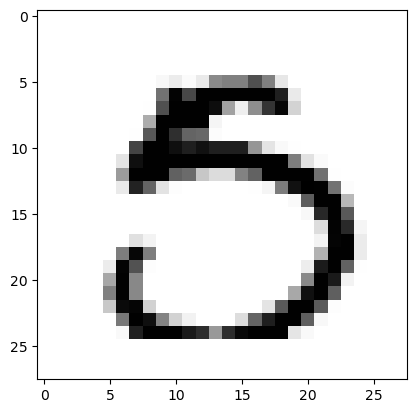

In [48]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측해보자.
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)
    
    print('Label:', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction:', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()